In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# **Анализ высоты случайного дерева поиска при вставке упорядоченной последовательности 16383 элементов**

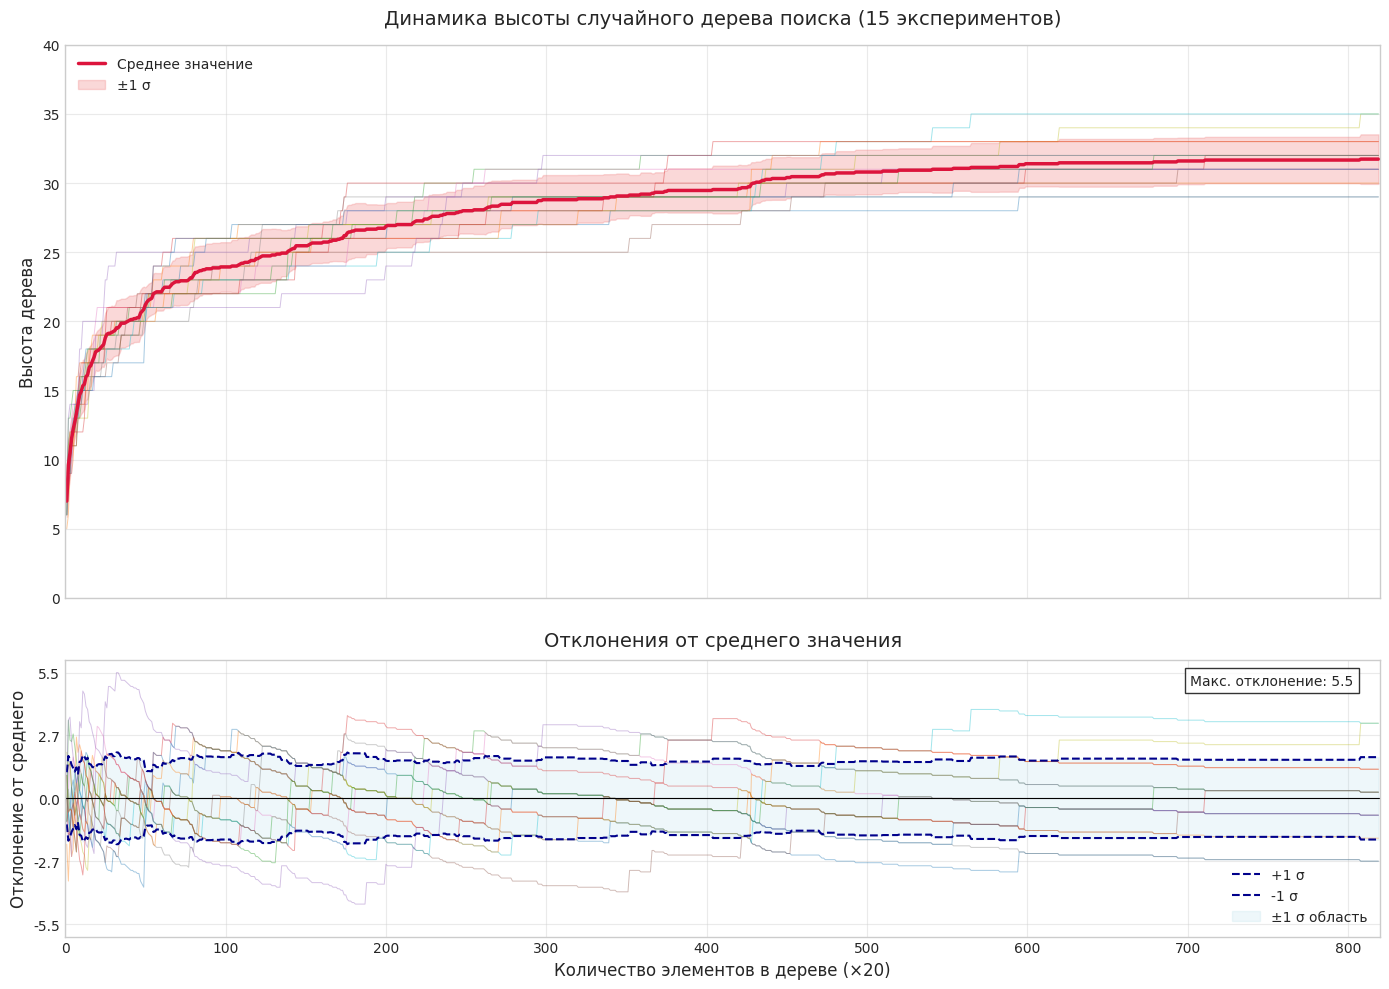

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12

# Чтение данных (вариант с транспонированием)
df = pd.read_csv('randTree - experimental heights.csv', sep=';', index_col=0)
df = df.transpose()

# Вычисление статистических характеристик
mean_values = df.mean(axis=1)
std_dev = df.std(axis=1)
max_dev = df.max(axis=1) - mean_values
min_dev = df.min(axis=1) - mean_values

# Создание фигуры с двумя графиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                              gridspec_kw={'height_ratios': [2, 1]})

# Первый график: экспериментальные данные, среднее
# и область в рамках стандартного отклонения
for column in df.columns:
    ax1.plot(df.index.astype(int), df[column], linewidth=0.7, alpha=0.4)
ax1.plot(mean_values.index.astype(int), mean_values,
        color='crimson', linewidth=2.5, label='Среднее значение')
ax1.fill_between(mean_values.index.astype(int),
                mean_values - std_dev,
                mean_values + std_dev,
                color='lightcoral', alpha=0.3, label='±1 σ')

# Второй график: отклонения от среднего
# Отображаем разницу между каждым экспериментом и средним значением
for column in df.columns:
    deviations = df[column] - mean_values
    ax2.plot(deviations.index.astype(int), deviations,
             linewidth=0.7, alpha=0.4)

# Добавляем линии для стандартного отклонения и области внутри на второй график
ax2.plot(std_dev.index.astype(int), std_dev,
        color='darkblue', linewidth=1.5, linestyle='--', label='+1 σ')
ax2.plot(std_dev.index.astype(int), -std_dev,
        color='darkblue', linewidth=1.5, linestyle='--', label='-1 σ')
ax2.fill_between(std_dev.index.astype(int),
                -std_dev,
                std_dev,
                color='lightblue', alpha=0.2, label='±1 σ область')

# Настройка первого графика
ax1.set_title('Динамика высоты случайного дерева поиска (15 экспериментов)', pad=15)
ax1.set_ylabel('Высота дерева')
ax1.legend(loc='upper left')
ax1.set_xlim(0, 820)
ax1.set_ylim(0, 40)
ax1.set_yticks(np.arange(0, 41, 5))
ax1.grid(alpha=0.4)

# Настройка второго графика
ax2.set_title('Отклонения от среднего значения', pad=10)
ax2.set_xlabel('Количество элементов в дереве (×20)')
ax2.set_ylabel('Отклонение от среднего')
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='-')
ax2.legend(loc='lower right')
ax2.set_xlim(0, 820)
ax2.grid(alpha=0.4)

# Рассчитываем динамический масштаб для оси отклонений
max_abs_dev = max(np.abs(min_dev.max()), np.abs(max_dev.max()))
ax2.set_ylim(-max_abs_dev*1.1, max_abs_dev*1.1)

# Автоматический подбор шага для оси Y отклонений
y_ticks = np.linspace(-max_abs_dev, max_abs_dev, 5)
ax2.set_yticks(y_ticks)
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

# Добавление информации о масштабе отклонений
ax2.text(0.98, 0.95, f'Макс. отклонение: {max_abs_dev:.1f}',
        transform=ax2.transAxes, ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.8))

# Оптимизация расположения
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)

# Сохранение и отображение
plt.savefig('randTree_heights_with_deviations.png', dpi=300, bbox_inches='tight')
plt.show()



*   Случайное дерево поиска также реализует идею того, что если хорошо перемешать значения в исходной последовательности, то в итоге будем получать довольно неплохую производительность. Перемешивание значений в случайном дереве реализуется за счет того, что некоторые значения будут перемещаться в корень.
*   Мы также видим, что высота случайного дерева поиска отличается от идеальной (14 для 16383 элементов) примерно в 2.5 раза.
* Судя по второму графику отклонений от среднего значения, мы также видим и можем оценить относительный разброс данных, полученных по 15 проведенным экспериментам

